### LINK DATASET = https://www.kaggle.com/datasets/mdwaquarazam/automobilepartsindentification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras.preprocessing.image import ImageDataGenerator
from os import listdir
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## POSSTEST 7 CNN
### SIAPKAN IMAGE UNTUK DIPAKAI

In [2]:
dir = "Automobile-parts"
lebar = 300
tinggi = 300
img_shape = (lebar, tinggi)

### BIKIN DATAGEN

In [3]:
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2
    
)

In [4]:
classes = sorted(listdir(dir))
classes

['Bevel-gear',
 'bearing',
 'clutch',
 'cylincer',
 'filter',
 'fuel-tank',
 'helical_gear',
 'piston',
 'rack-pinion',
 'shocker',
 'spark-plug',
 'spur-gear',
 'valve',
 'wheel']

### MEMBUAT FLOW FROM DIRECTORY

In [5]:
train_generator = datagen.flow_from_directory(
    dir,
    target_size = img_shape,
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical', #isi 'binary' jika class hanya dua, isi categorical jika lebih dari2 
    subset = 'training', #wajib ada subset, karena untuk membedakan train/val
)
val_generator = datagen.flow_from_directory(
    dir,
    target_size = img_shape,
    batch_size = 32,
    #shuffle = True,
    class_mode = 'categorical', #isi 'binary' jika class hanya dua, isi categorical jika lebih dari2 
    subset = 'validation', #wajib ada subset, karena untuk membedakan train/val
    
    
)


Found 557 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


## MEMBUAT MODEL

In [6]:
model = tf.keras.Sequential([
    Conv2D(128, 3, activation = 'relu', input_shape = [300, 300, 3]),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, 3, activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),

    Dense(1024, activation = 'relu'),
    Dense(14, activation = 'softmax')
    
])

model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc']
             )

In [7]:
hasil = model.fit(train_generator, validation_data = val_generator, epochs = 20, verbose = 1)

Epoch 1/20
 5/18 [=======>......................] - ETA: 1:52 - loss: 5.7788 - acc: 0.0875

C:\Users\Yha\B1-21\Yahya_073\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/18 [==============================] - 186s 9s/step - loss: 3.5811 - acc: 0.0718 - val_loss: 2.6257 - val_acc: 0.0687
Epoch 2/20
18/18 [==============================] - 138s 8s/step - loss: 2.6124 - acc: 0.0790 - val_loss: 2.5357 - val_acc: 0.0916
Epoch 3/20
18/18 [==============================] - 133s 7s/step - loss: 2.6026 - acc: 0.1059 - val_loss: 2.5547 - val_acc: 0.1298
Epoch 4/20
18/18 [==============================] - 134s 7s/step - loss: 2.5369 - acc: 0.1275 - val_loss: 2.4610 - val_acc: 0.1527
Epoch 5/20
18/18 [==============================] - 132s 7s/step - loss: 2.4811 - acc: 0.1957 - val_loss: 2.4676 - val_acc: 0.1832
Epoch 6/20
18/18 [==============================] - 131s 7s/step - loss: 2.4855 - acc: 0.1849 - val_loss: 2.5652 - val_acc: 0.1298
Epoch 7/20
18/18 [==============================] - 136s 8s/step - loss: 2.4802 - acc: 0.1885 - val_loss: 2.5467 - val_acc: 0.1603
Epoch 8/20
18/18 [==============================] - 138s 8s/step - loss: 2.3823 - acc: 0.2190 

## UNDERFITTING
### BIKIN ULANG MODELNYA SIAPATAU BISA BAGUS

In [17]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [14]:
modelv2 = tf.keras.Sequential([
    InceptionV3(include_top = False, input_shape = [lebar, tinggi, 3]),
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation = 'relu'),
    Dense(14, activation = 'softmax')
    
    
])

In [15]:
print(train_generator.samples, val_generator.samples)

557 131


In [19]:
opt = Adam(learning_rate = 0.0001)
modelv2.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['acc'])
hasilv2  = modelv2.fit(
    train_generator,
    epochs = 20,
    validation_data = val_generator, 
    verbose = 1
)

Epoch 1/20
18/18 [==============================] - 294s 15s/step - loss: 0.6866 - acc: 0.8312 - val_loss: 0.5151 - val_acc: 0.8321
Epoch 2/20
18/18 [==============================] - 268s 15s/step - loss: 0.1642 - acc: 0.9641 - val_loss: 0.3099 - val_acc: 0.9008
Epoch 3/20
18/18 [==============================] - 269s 15s/step - loss: 0.0842 - acc: 0.9803 - val_loss: 0.3892 - val_acc: 0.8626
Epoch 4/20
18/18 [==============================] - 269s 15s/step - loss: 0.0955 - acc: 0.9820 - val_loss: 0.3964 - val_acc: 0.8779
Epoch 5/20
18/18 [==============================] - 266s 15s/step - loss: 0.0350 - acc: 0.9946 - val_loss: 0.4029 - val_acc: 0.8855
Epoch 6/20
18/18 [==============================] - 268s 15s/step - loss: 0.0386 - acc: 0.9856 - val_loss: 0.3504 - val_acc: 0.8931
Epoch 7/20
18/18 [==============================] - 268s 15s/step - loss: 0.0673 - acc: 0.9856 - val_loss: 0.4475 - val_acc: 0.8550
Epoch 8/20
18/18 [==============================] - 264s 15s/step - loss: 0.

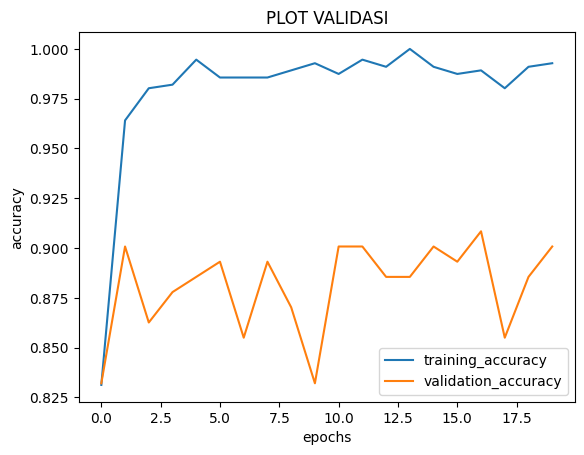

In [23]:
plt.plot(hasilv2.history['acc'])
plt.plot(hasilv2.history['val_acc'])
plt.title('PLOT VALIDASI')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

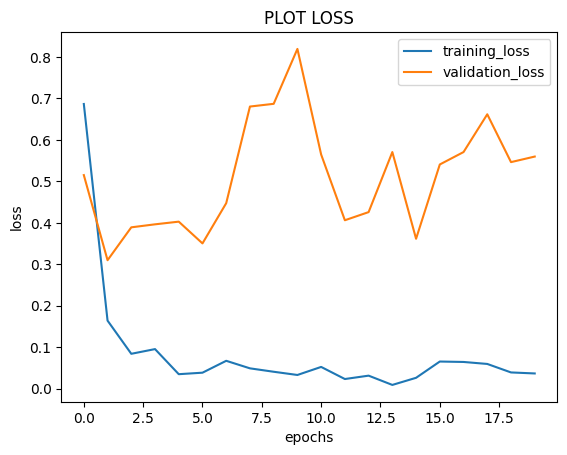

In [24]:
plt.plot(hasilv2.history['loss'])
plt.plot(hasilv2.history['val_loss'])
plt.title('PLOT LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

## entah ini overfitting atau enggak, tp akurasi udah lebih bagus dari model sebelumnya

mari kita coba untuk mendownload gambar dari google, dan liat apakah model bisa memprediksi gambarnya

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [35]:
def predict_img(img_path):
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0

    plt.title("PREDIKSI GAMBAR")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    p = modelv2.predict(img[np.newaxis,...])
    print('Confidence: ',str(round(np.max(p[0])*100, 2))+'%')
    print('Class: ',classes[np.argmax(p[0])])
    print("\n")

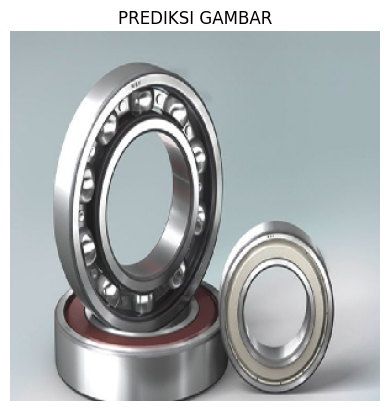

1/1 [==============================] - 0s 150ms/step
Confidence:  100.0%
Class:  bearing




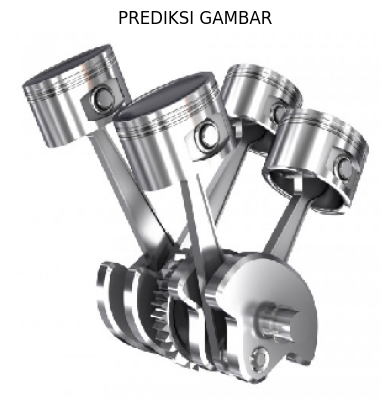

1/1 [==============================] - 0s 171ms/step
Confidence:  99.99%
Class:  piston




In [36]:
predict_img('uji1.jpg')
predict_img('uji2.jpg')

In [38]:
modelv2.save(dir)

INFO:tensorflow:Assets written to: Automobile-parts\assets


INFO:tensorflow:Assets written to: Automobile-parts\assets


## MODEL INI BERHASIL MEMPREDIKSI GAMBAR
dari gambar yang saya ambil di google, model ini cukup baik dalam menebak gambar spare part dari otomotif. dengan nilai confidence yang cukup tinggi. 


Peningkatan akurasi sangat tinggi setelah dilakukan pembuatan ulang pada arsitektur model sequential, dan model yang sudah di training di save dalam direktori dataset untuk dicoba.

sudah dibuat fungsi untuk menguji model ini dengan parameter directory gambar